# 1. GIẢI THUẬT 1: CÂY QUYẾT ĐỊNH VÀ RỪNG CÂY

## Bài tập thực hành 1
Xây dựng cây quyết định và rừng cây trên dữ liệu Titanic lấy từ
https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset

### 1. Tải package.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400 
import graphviz 
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier

### 2. Đọc dữ liệu

In [2]:
df = pd.read_csv('dataset/train.csv')

### 3. Làm sạch dữ liệu

In [3]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())
df = df.drop('Cabin', axis = 1)
df = df.drop('PassengerId', axis = 1)
df = df.drop('Ticket', axis = 1)
df = df.drop('Name', axis = 1)

In [4]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [5]:
X = df.drop('Survived', axis = 1);
y = df['Survived']

### 4. Chuẩn bị dữ liệu

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y) 

### 5. Xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn

In [7]:
dt = tree.DecisionTreeClassifier(max_depth=2) 
dt.fit(X_train, y_train) 

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 6. Hiển thị cây quyết định với package graphviz

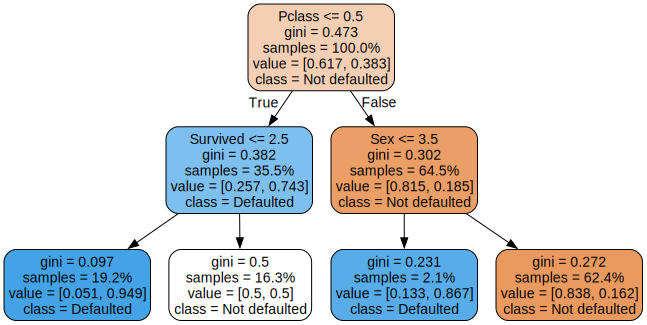

In [8]:
features_response = df.columns.tolist()
dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True, feature_names=features_response[:-1], 
proportion=True, class_names=['Not defaulted', 'Defaulted']) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
### 7. Xây dựng rừng cây (random forest)